In [1]:
%matplotlib inline
from mxnet import nd, autograd
from IPython import display
from matplotlib import pyplot as plt
import random

In [5]:
num_inputs = 2
num_samples = 1000
true_W = nd.array([2, -3.4]).reshape(2, 1)
true_b = 4.2
features = nd.random.normal(scale = 1, shape = (num_samples, num_inputs))
labels = nd.dot(features, true_W) + true_b
labels += nd.random.normal(scale = 0.01, shape = labels.shape)

In [6]:
features[0], labels[0]

(
 [0.7787424 0.6087823]
 <NDArray 2 @cpu(0)>, 
 [3.6782274]
 <NDArray 1 @cpu(0)>)

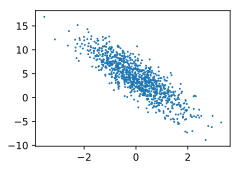

In [7]:
def use_svg_display():
    display.set_matplotlib_formats('svg')

def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize

set_figsize()
plt.scatter(features[:, 1].asnumpy(), labels.asnumpy(), 1);

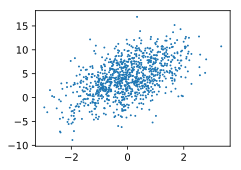

In [9]:
set_figsize()
plt.scatter(features[:, 0].asnumpy(), labels.asnumpy(), 1);

In [11]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        j = nd.array(indices[i: min(i + batch_size, num_examples)])
        yield features.take(j), labels.take(j)
        

batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break



[[ 2.0901256   0.07000115]
 [ 2.198087    0.22961554]
 [-1.377532   -1.0048125 ]
 [ 0.435887   -0.42387986]
 [ 1.1289158   0.70215666]
 [ 1.280501    0.30633074]
 [ 0.55032504 -0.11991487]
 [-1.3442434  -0.24999714]
 [-0.20873196 -0.97169197]
 [-0.7422406  -1.6189353 ]]
<NDArray 10x2 @cpu(0)> 
[[8.154461 ]
 [7.8062835]
 [4.8570952]
 [6.5199413]
 [4.055172 ]
 [5.715405 ]
 [5.7108536]
 [2.354559 ]
 [7.0898957]
 [8.214953 ]]
<NDArray 10x1 @cpu(0)>


In [19]:
# initialize the parameter
w = nd.random.normal(scale = 0.01, shape=(num_inputs, 1))
b = nd.zeros(shape = 1)
w, b

(
 [[0.00402366]
  [0.00345934]]
 <NDArray 2x1 @cpu(0)>, 
 [0.]
 <NDArray 1 @cpu(0)>)

In [20]:
w.attach_grad()
b.attach_grad()

def linear_regression(X, w, b):
    return nd.dot(X, w) + b


def square_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2


def sgd(params, lr, batch_size):
    for param in params:
        param[:] = param - lr * param.grad / batch_size

        
lr = 0.02
num_epochs = 5
networks = linear_regression
loss = square_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        with autograd.record():
            l = loss(networks(X, w, b), y)
        l.backward()
        sgd([w, b], lr, batch_size)
    train_l = loss(networks(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().asscalar()))    

epoch 1, loss 0.329841
epoch 2, loss 0.007031
epoch 3, loss 0.000201
epoch 4, loss 0.000052
epoch 5, loss 0.000049


In [21]:
true_W, w

(
 [[ 2. ]
  [-3.4]]
 <NDArray 2x1 @cpu(0)>, 
 [[ 1.9999495]
  [-3.3994105]]
 <NDArray 2x1 @cpu(0)>)

In [22]:
true_b, b

(4.2, 
 [4.199656]
 <NDArray 1 @cpu(0)>)